**WEEK 13:**
i. Write a program to perform Clustering using K-means after applying PCA and
Determining the value of K using the Elbow method.


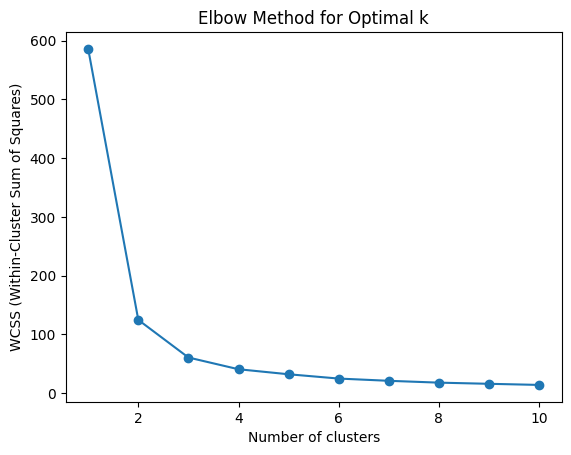

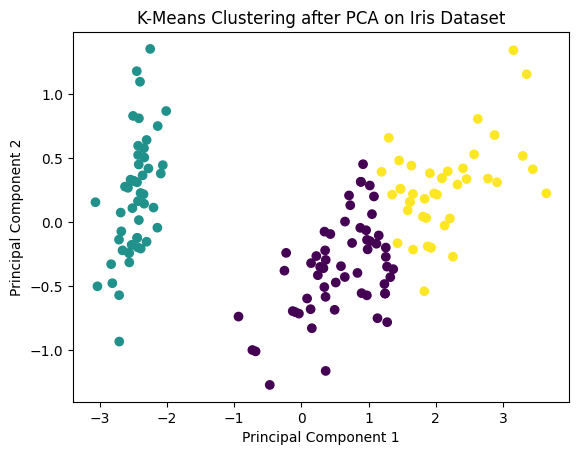

The average silhouette score for 3 clusters is: 0.5835695249259651


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

iris= load_iris()
# Load the Iris dataset
#iris = pd.read_csv('iris.csv')

# Separate features and target variable
X = iris.data[:, :-1]
y = iris.target

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduced to 2 components for visualization
X_pca = pca.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Apply K-Means clustering with the optimal number of clusters (determined from the Elbow plot)
# Based on the Elbow plot, 3 clusters seems to be the optimal number.
optimal_k = 3  #  Adjust this value based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
iris['cluster'] = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris['cluster'], cmap='viridis')
plt.title('K-Means Clustering after PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluate clustering performance using Silhouette Score
silhouette_avg = silhouette_score(X_pca, iris['cluster'])
print(f"The average silhouette score for {optimal_k} clusters is: {silhouette_avg}")




WEEK 13:
ii. Write a program to build a model to perform hierarchical clustering.

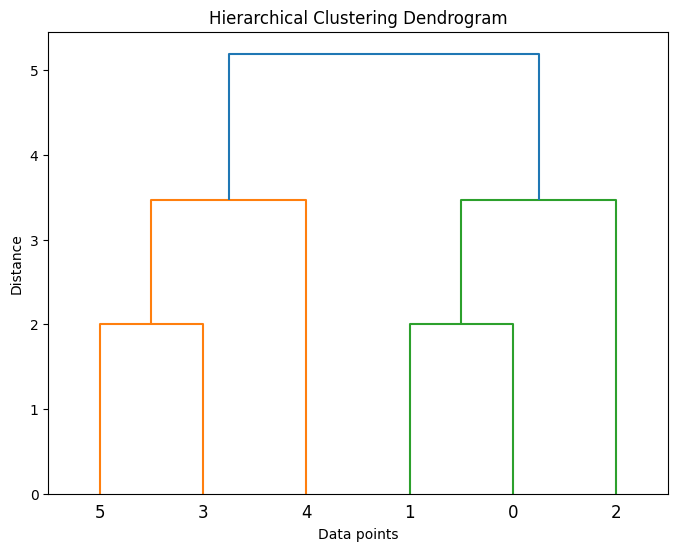

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Sample data (replace with your own)
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

# Perform hierarchical clustering
Z = linkage(X, 'ward')  # 'ward' linkage minimizes variance

# Plot the dendrogram
fig = plt.figure(figsize=(8, 6))
dendrogram(Z,
           labels=None,  # No labels for this example
           orientation="top",
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

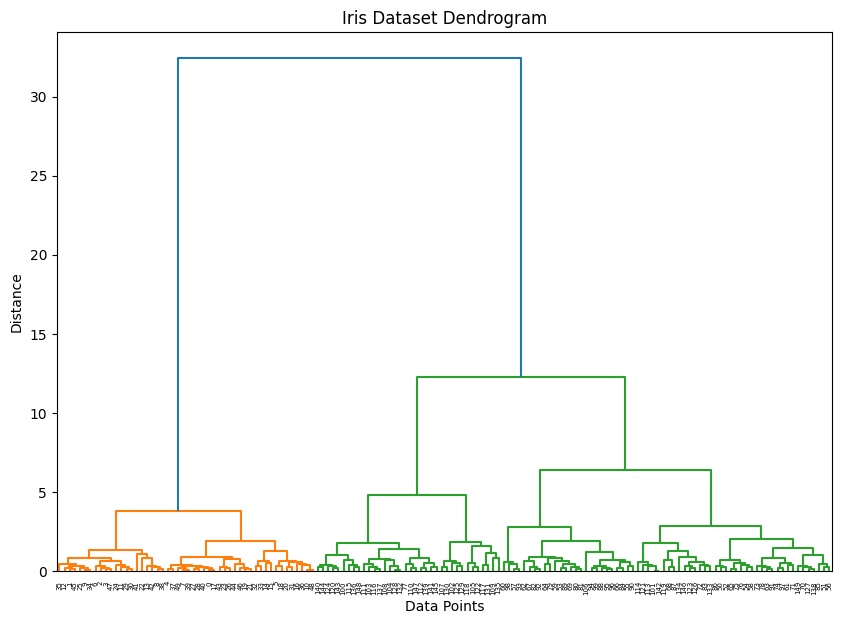

Predicted Clusters:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

Iris Data with Clusters and Species:
     sepal_length  sepal_width  petal_length  petal_width  cluster    species
0             5.1          3.5           1.4          0.2        1     setosa
1             4.9          3.0           1.4          0.2        1     setosa
2             4.7          3.2           1.3          0.2        1     setosa
3             4.6          3.1           1.5          0.2        1     setosa
4             5.0          3.6           1.4          0.2        1     setosa
..            ...          ...           ...          ...      ...        ...
145           6.7          3.0           5.2          2.3        2  virginica
146         

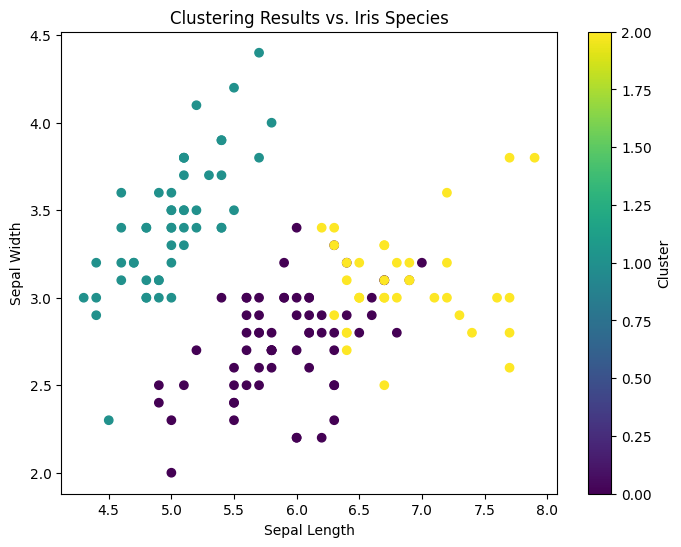

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels (species)

# 2. Perform Hierarchical Clustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(X)
labels = model.labels_

# 3. Visualize the Dendrogram
plt.figure(figsize=(10, 7))  # Adjust figure size for better visualization
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))  # 'ward' is a good choice
plt.title('Iris Dataset Dendrogram')  # Add a title to the plot
plt.xlabel('Data Points')  # Label the x-axis
plt.ylabel('Distance')  # Label the y-axis
plt.show()

# 4.  Print the Predicted Clusters
print("Predicted Clusters:")
print(labels)

# 5. Optional: Compare with actual labels (species)
iris_df = pd.DataFrame(data=X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['cluster'] = labels
iris_df['species'] = pd.Series(y).map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the DataFrame
print("\nIris Data with Clusters and Species:")
print(iris_df)

# Visualize the clusters against the species labels
plt.figure(figsize=(8, 6))
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c=iris_df['cluster'], cmap='viridis')
plt.title("Clustering Results vs. Iris Species")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.colorbar(label="Cluster")
plt.show()
